In [1]:
FILENAME = "Expl7-ThermRad_L1-TempAllSensors_1960m0416_1960m0604_DR2858-002.txt"

file = open(FILENAME, "r")

lines = file.readlines()

In [2]:
data = []

record = { "header": {}, "datapoints": {}}

datapoint = {}

first = True

header = True

for line in lines:
    words = line.split("=")
    
    if len(words) > 1:
        variable_name = words[0].strip().replace(" ", "_")
        variable_value = words[1].strip()
        
        #if the var name is record we have a new section of datapoints, otherwise a new datapoint
        if variable_name == "RECORD":
            # dont append the first record
            if first == True:
                first = False
            else:
                #if not the first append the record
                data.append(record)

            # create new record 
            record = { "header": { variable_name: variable_value}, "datapoints": []}
            
            #the following lines will end up in header
            header = True
        else:
            # new data point

            if header == True:
                record["header"][variable_name] = variable_value
            else:
                if variable_name:
                    variable_value = float(variable_value)
                    
                    if variable_value > 0:
                        if datapoint.get(variable_name) is None:
                            datapoint[variable_name] = []
                        
                        datapoint[variable_name].append(variable_value)
    else:
        #new section started, if we added headers before add the following lines to datapoints
        if header == False:
            if datapoint:
                record["datapoints"].append(datapoint)
                
            datapoint = {}
        else:
            header = False

In [3]:
import json

writefile = open(FILENAME + ".json", "w")
json.dump(data, writefile)
writefile.close()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

name = "ABMA3"

In [5]:
x = []
y = []

for entry in data:
    timestamp = float(entry["header"]["DAY"]) * 24 * 60 * 60
    timestamp += float(entry["header"]["HOUR"]) * 60 * 60
    timestamp += float(entry["header"]["MINUTE"]) * 60
    timestamp += float(entry["header"]["SECOND"])
    
    count = 0
    average = 0.0
    
    for point in entry["datapoints"]:
        if point.get(name) is not None:
            for value in point[name]:
                if value != "0.00":
                    average += float(value)
                    count += 1
    if count != 0:
        y.append(average/count)
        x.append(timestamp)

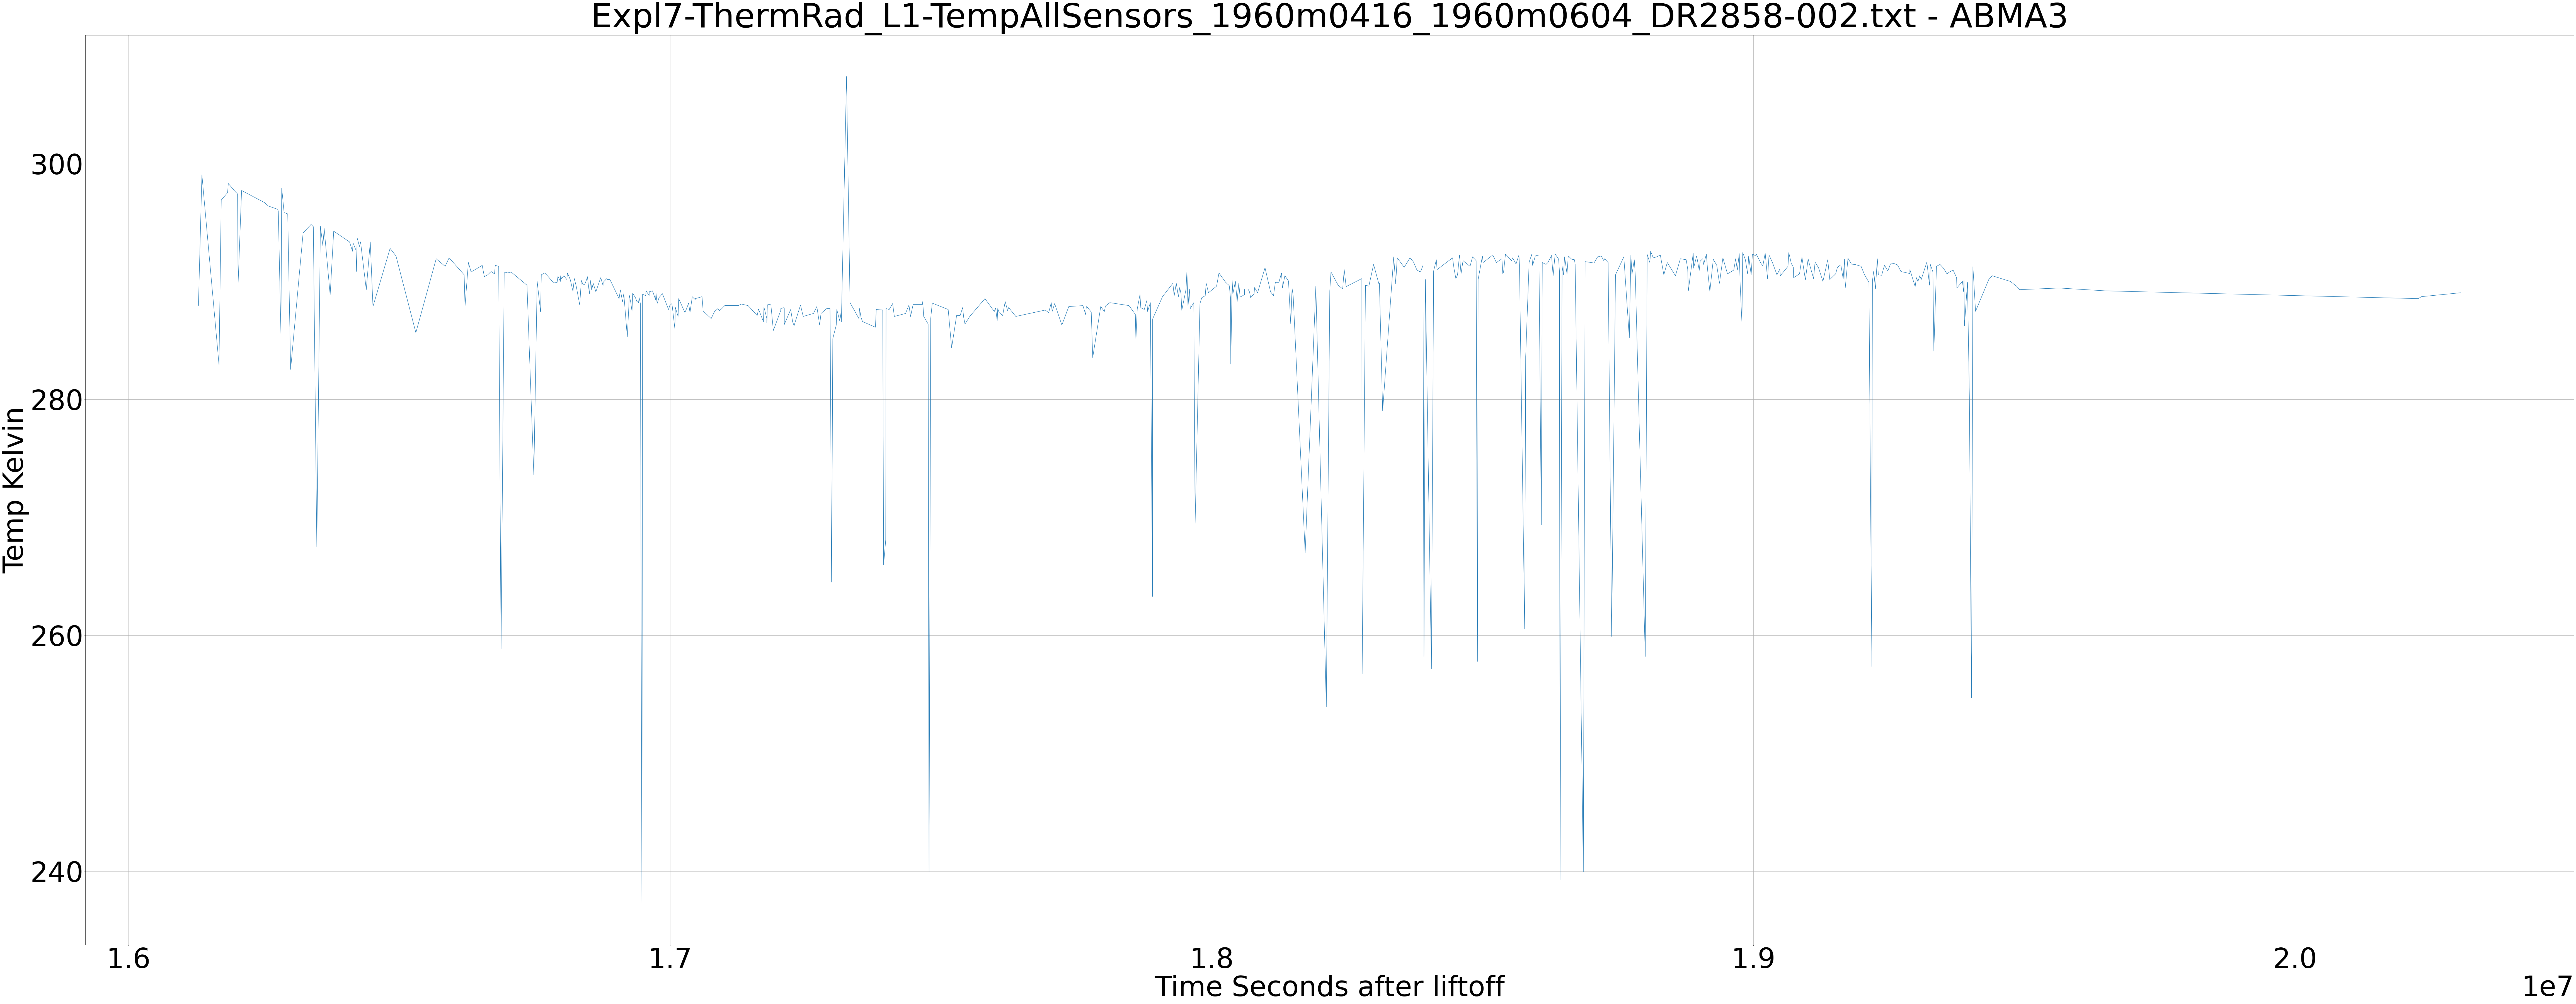

In [9]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.grid()

plt.title(FILENAME + " - " + name)
plt.xlabel("Time Seconds after liftoff")
plt.ylabel("Temp Kelvin")
plt.rcParams["figure.figsize"] = (160, 60)

plt.rcParams.update({'font.size': 400})

fig.savefig(FILENAME + name + ".png")
plt.show()